# **Benchmark** atomicité du texte : documents ou phrases ?

Faut-il ou non décomposer les documents en phrases ?

Concernant le corpus `product_name`, cela fait peu de différence puisque les noms de produits sont pour la plupart donnés sur une seule phrase (1050 documents, 1060 phrases).

En revanche, pour le corpus `description`, le découpage des phrases conduit à un corpus prétraité composé de 5199 phrases. Cette approche nous semblait pertinente, mais les performances n'ont pas été au renez-vous, même après combinaison des prédictions sur l'ensemble des phrases d'un même document.

Ce benchmark est là pour trancher entre ces deux stratégies, éventuellement en liaison avec certains paramètres.

`pipeline.tx_ml_preprocess` possède un paramètre booléen `sent_tokenize` qui détermine si le corpus traité est divisé en phrases (munies de l'index du document dont elles sont extraites), ou s'il reste dans son format nominal où l'atome est le document.

## Chargement des 4 exemplaires du corpus `description`

On commence avec celui-ci puisqu'il est le premier concerné par cette problématique.


PREPROCESSING OF CORPUS `DESCRIPTION`
n_sentences: 1050


,10,11,12,13,14,15,16,17,18,19,...,217,221,222,224,228,233,245,264,341,356
freq,1,4,37,33,27,45,24,47,21,38,...,6,1,2,1,1,1,1,1,1,1


mean: 50.01
med : 31.00
std : 46.41


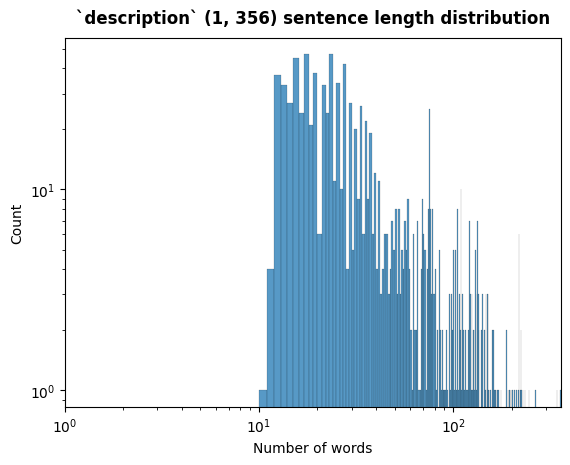


PREPROCESSING OF CORPUS `DESCRIPTION`
n_sentences: 1050


,9,10,11,12,13,14,15,16,17,18,...,215,223,224,228,232,235,244,264,337,355
freq,1,2,35,32,28,46,31,29,36,24,...,1,6,2,1,1,1,1,1,1,1


mean: 49.26
med : 30.00
std : 46.53


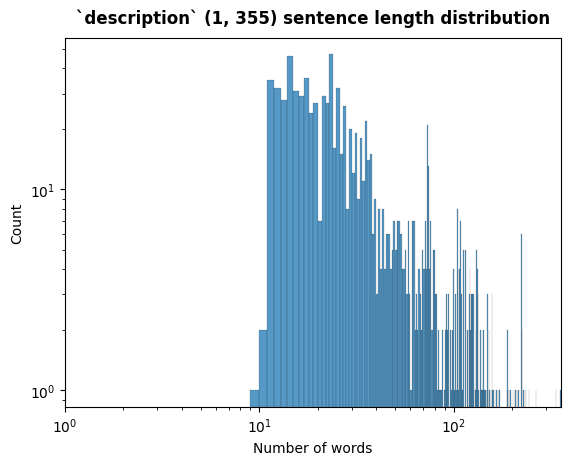


PREPROCESSING OF CORPUS `DESCRIPTION`
n_sentences: 5199


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,93,96,105,109,110,139
freq,46,273,1118,453,175,290,244,292,260,368,...,1,1,1,1,1,1,1,1,1,1


mean: 10.10
med : 7.00
std : 12.92


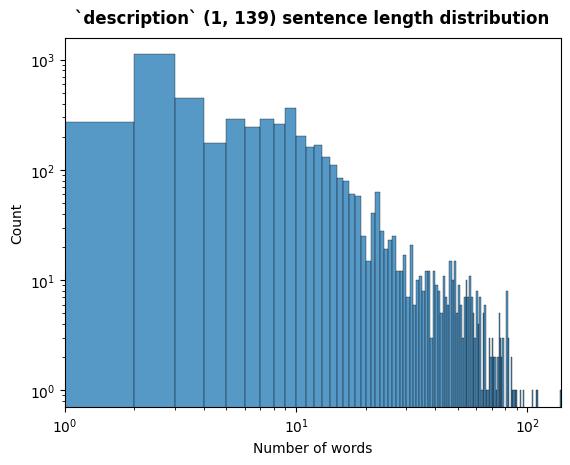


PREPROCESSING OF CORPUS `DESCRIPTION`
n_sentences: 5199


,0,1,2,3,4,5,6,7,8,9,...,83,85,87,89,92,95,100,105,106,146
freq,270,52,1123,464,168,314,245,306,237,362,...,3,7,1,1,1,1,1,1,1,1


mean: 9.95
med : 6.00
std : 12.87


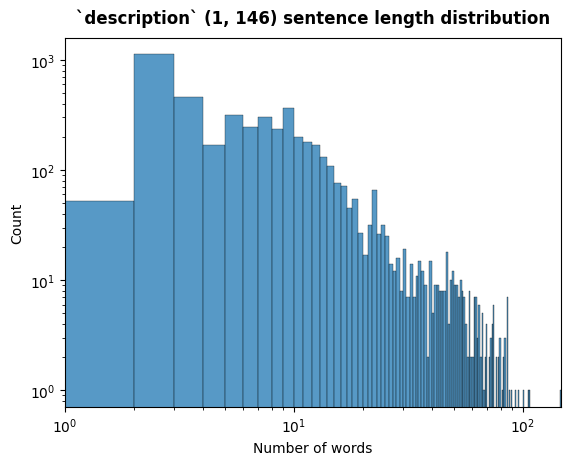

In [1]:
from tx_pipeline import tx_ml_preprocess
from tx_prep import flipkart_word_tokenize
name = 'description'
corpora = [
    tx_ml_preprocess(name),
    tx_ml_preprocess(name, tokenize_func=flipkart_word_tokenize),
    tx_ml_preprocess(name, sent_tokenize=True),
    tx_ml_preprocess(name, sent_tokenize=True, tokenize_func=flipkart_word_tokenize)
]

## Synthèse des résultats du benchmark

Voici les résultats de la comparaison sur une même configuration (`config_1`) de `new_tx_ml_bow_count` :

    vectorizer_params={
        'min_df': 5,
        'max_df': .7,
        'ngram_range': (1, 5)
    },
    tsne_params={
        'perplexity': 100.0
    }

|Test|Total time|n_docs|n_sents|n_features|ARI (pred by sent)|ARI (pred by doc)|
|-|-|-|-|-|-|-|
|**A** docs, |15 s, 355 ms|1050|1050|4741|0.3804|0.3804|
|**B** docs, fl_wt|13 s, 938 ms|1050|1050|4804|0.3151|0.3151|
|**C** sents|1 m, 21 s|1050|5199|5140|0.0445|0.1511|
|**D** sents, fl_wt|1 m, 14 s|1050|5199|5210|0.0549|0.1409|

Conclusion, l'approche de la décomposition en phrases sous-performe de tous les points de vue et doit donc être abandonnée.

L'avantage à utiliser la fonction `flipkart_word_tokenize` que nous avons développée pour filtrer davantage que la fonction `word_tokenize` native de NLTK apporte un gain ou non suivant le niveau de perplexité. Cela laisse perplexe.

### `CountVectorizer`, config. 1


BAG OF WORDS - COUNTVECTORIZER (DESCRIPTION)

Create the CountVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


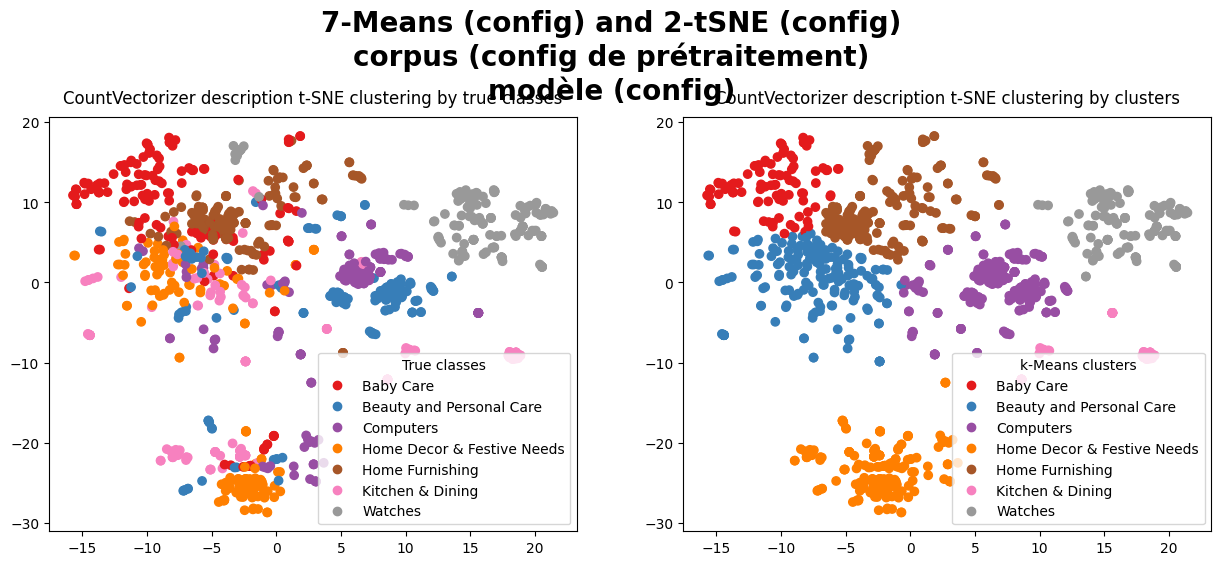

Total time
in 16 s, 401 ms, 567 mus
n_docs: 1050
n_sents: 1050
n_features: 4741
ARI (pred by sent): 0.3804
ARI (pred by doc): 0.3804

BAG OF WORDS - COUNTVECTORIZER (DESCRIPTION)

Create the CountVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


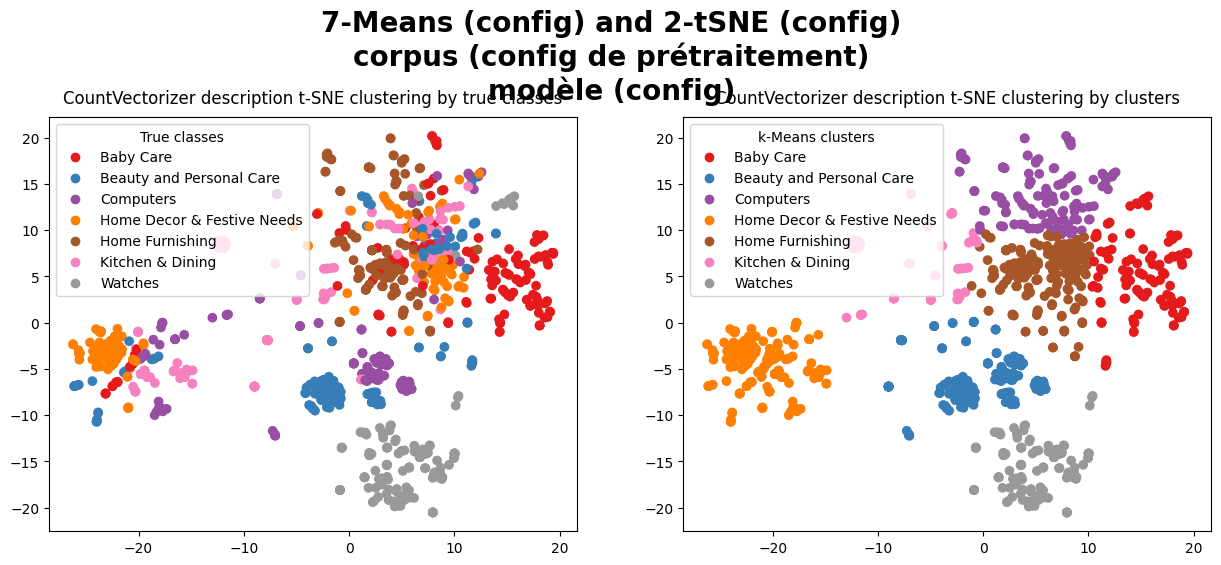

Total time
in 14 s, 891 ms, 230 mus
n_docs: 1050
n_sents: 1050
n_features: 4804
ARI (pred by sent): 0.3151
ARI (pred by doc): 0.3151

BAG OF WORDS - COUNTVECTORIZER (DESCRIPTION)

Create the CountVectorizer object

Feature extraction

tSNE and ARI


KeyboardInterrupt: 

In [2]:
from pipeline import tx_ml_bow_count

vectorizer_params = {
    'min_df': 5,
    'max_df': .7,
    'ngram_range': (1, 5)
}

tsne_params = {'perplexity': 100.0}

for sents, cla_labels in corpora:
    clu_labels, ari, total_time, n_features = tx_ml_bow_count(
        sents, cla_labels, name, verbosity=2,
        vectorizer_params=vectorizer_params,
        tsne_params=tsne_params,
    )

### `CountVectorizer`, config. 2


BAG OF WORDS - COUNTVECTORIZER (DESCRIPTION)

Create the CountVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


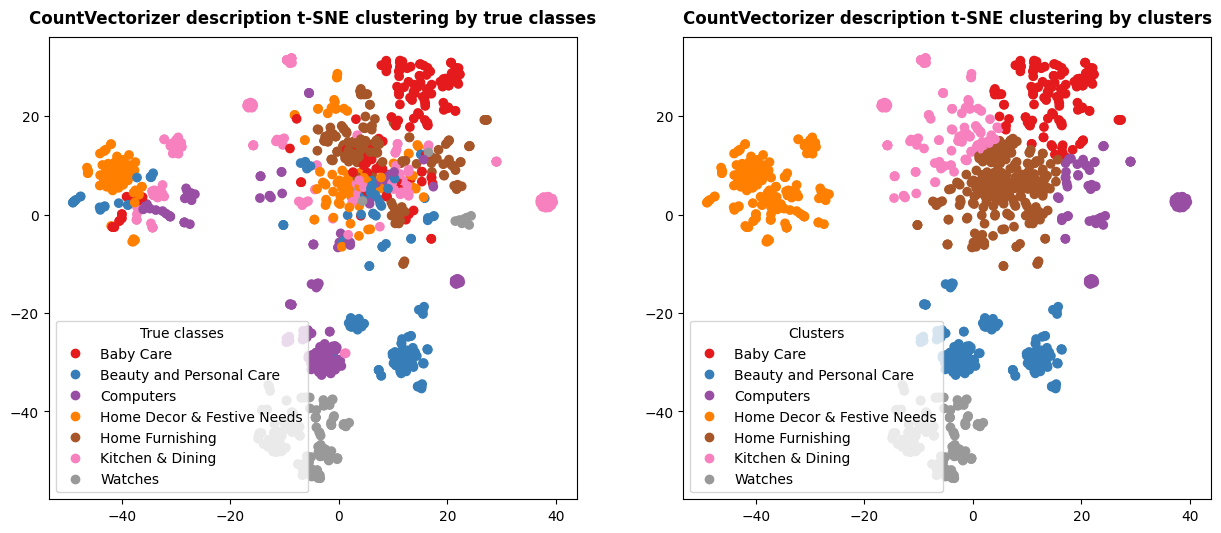

Total time
in 11 s, 170 ms, 618 mus
n_docs: 1050
n_sents: 1050
n_features: 4741
ARI (pred by sent): 0.2905
ARI (pred by doc): 0.2905

BAG OF WORDS - COUNTVECTORIZER (DESCRIPTION)

Create the CountVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


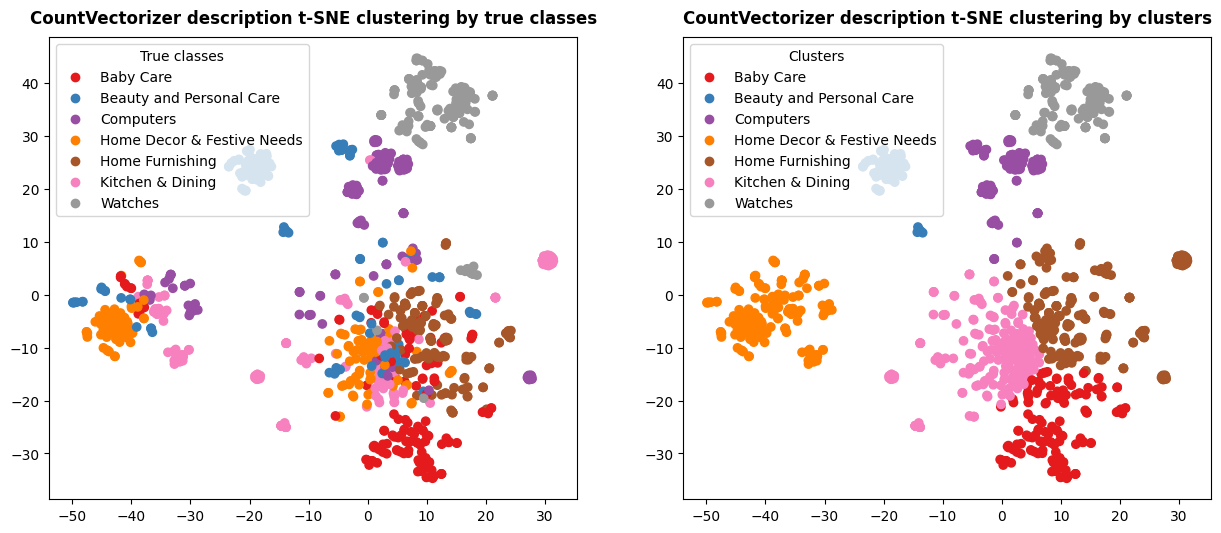

Total time
in 11 s, 720 ms, 699 mus
n_docs: 1050
n_sents: 1050
n_features: 4804
ARI (pred by sent): 0.3286
ARI (pred by doc): 0.3286

BAG OF WORDS - COUNTVECTORIZER (DESCRIPTION)

Create the CountVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


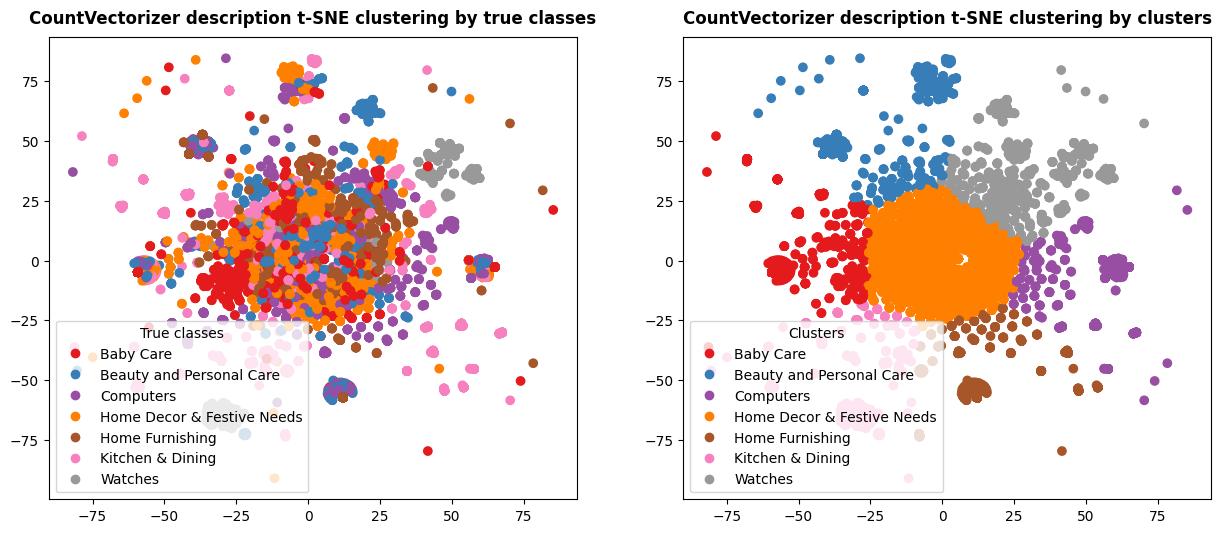

Total time
in 50 s, 752 ms, 312 mus
n_docs: 1050
n_sents: 5199
n_features: 5140
ARI (pred by sent): 0.0414
ARI (pred by doc): 0.1119

BAG OF WORDS - COUNTVECTORIZER (DESCRIPTION)

Create the CountVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


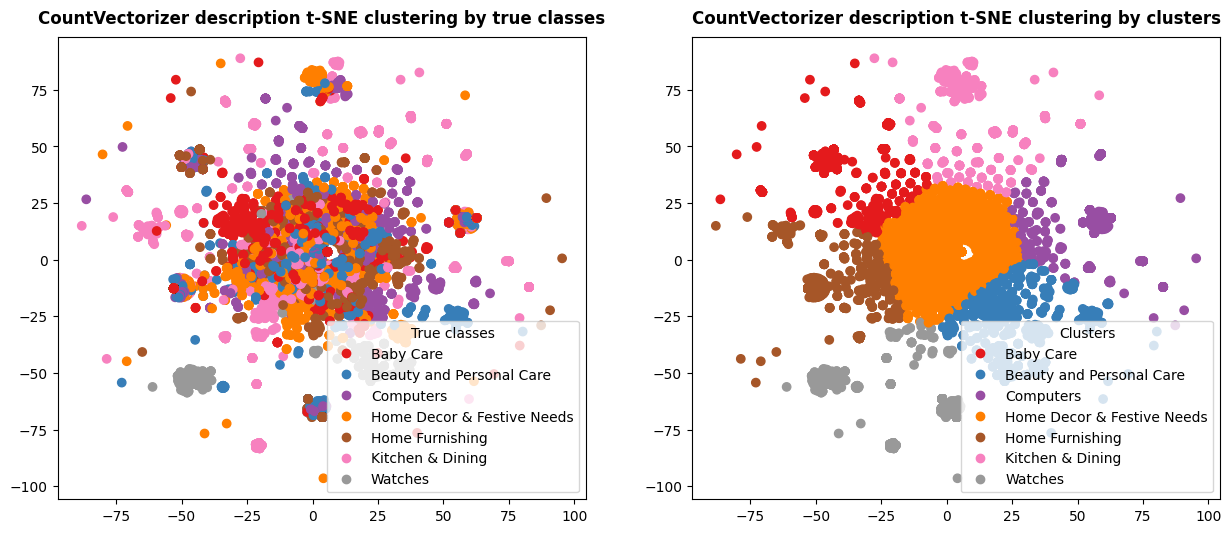

Total time
in 53 s, 880 ms, 482 mus
n_docs: 1050
n_sents: 5199
n_features: 5210
ARI (pred by sent): 0.0465
ARI (pred by doc): 0.1185


In [2]:
from pipeline import tx_ml_bow_count

vectorizer_params = {
    'min_df': 5,
    'max_df': .7,
    'ngram_range': (1, 5)
}

tsne_params = {'perplexity': 40.0}

for sents, cla_labels in corpora:
    clu_labels, ari, total_time, n_features = tx_ml_bow_count(
        sents, cla_labels, name, verbosity=2,
        vectorizer_params=vectorizer_params,
        tsne_params=tsne_params,
    )

### `TfidfVectorizer`, config. 2


BAG OF WORDS - TFIDFVECTORIZER (DESCRIPTION)

Create the TfidfVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


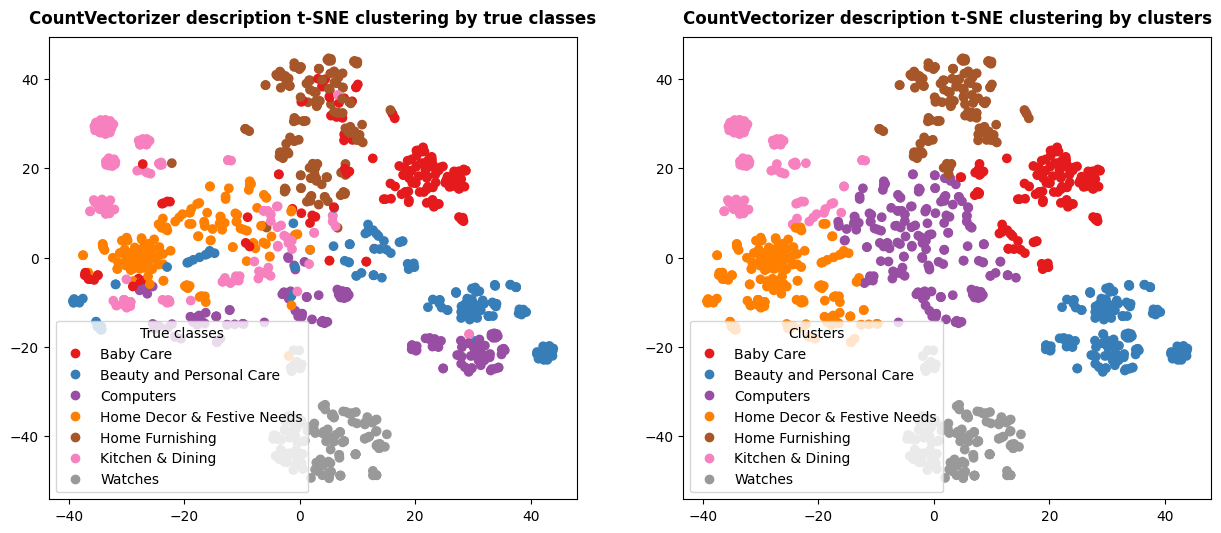

Total time
in 9 s, 857 ms, 312 mus
n_docs: 1050
n_sents: 1050
n_features: 4741
ARI (pred by sent): 0.4139
ARI (pred by doc): 0.4139

BAG OF WORDS - TFIDFVECTORIZER (DESCRIPTION)

Create the TfidfVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


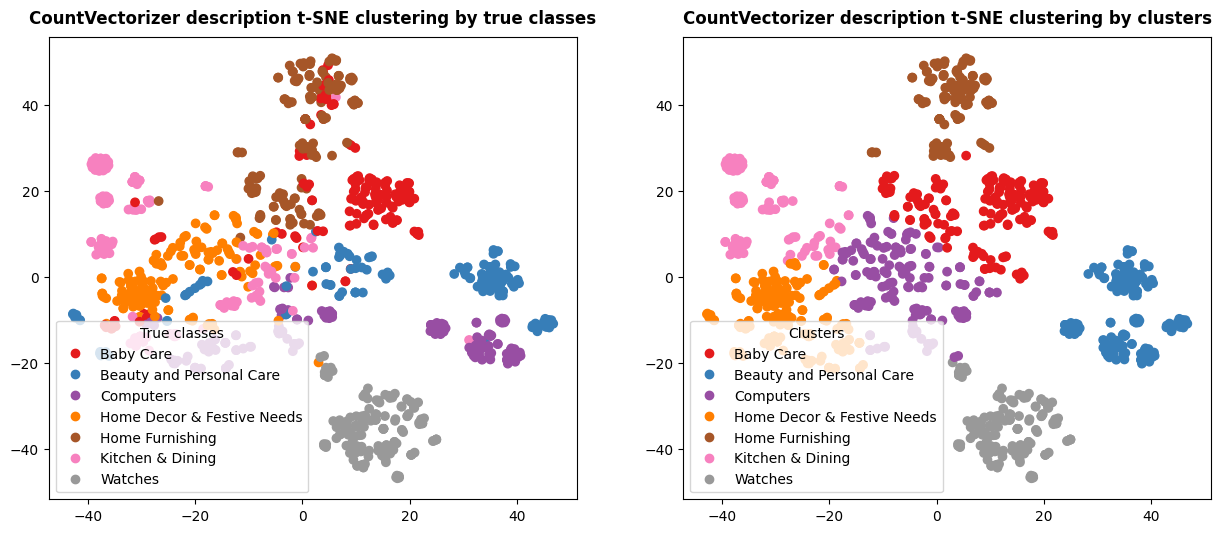

Total time
in 9 s, 592 ms, 67 mus
n_docs: 1050
n_sents: 1050
n_features: 4804
ARI (pred by sent): 0.4013
ARI (pred by doc): 0.4013

BAG OF WORDS - TFIDFVECTORIZER (DESCRIPTION)

Create the TfidfVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


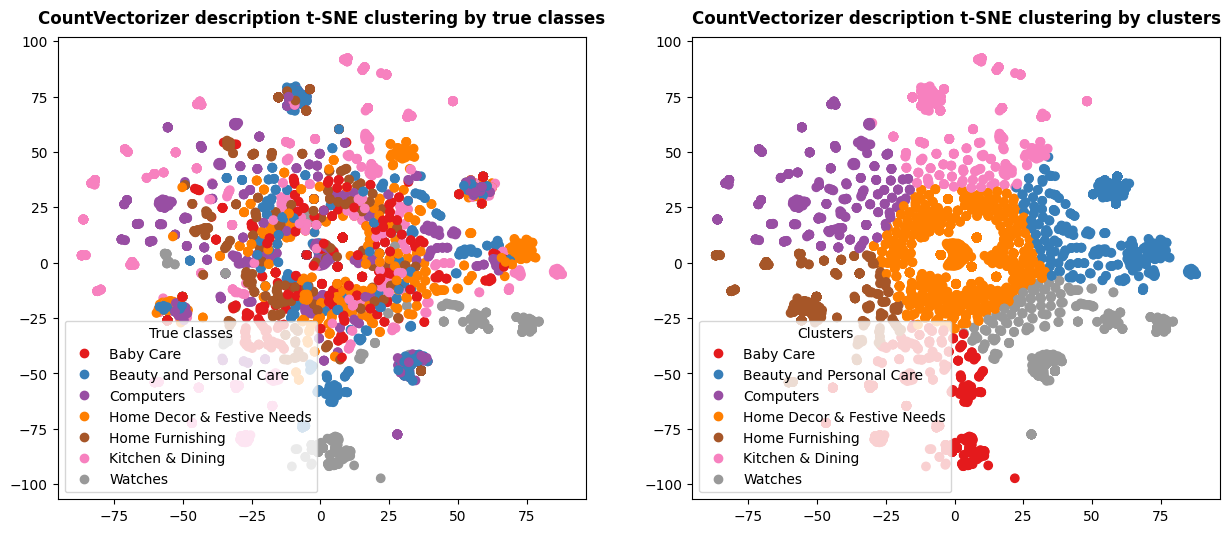

Total time
in 43 s, 567 ms, 931 mus
n_docs: 1050
n_sents: 5199
n_features: 5140
ARI (pred by sent): 0.0507
ARI (pred by doc): 0.1506

BAG OF WORDS - TFIDFVECTORIZER (DESCRIPTION)

Create the TfidfVectorizer object

Feature extraction

tSNE and ARI

Combine predictions

Plot


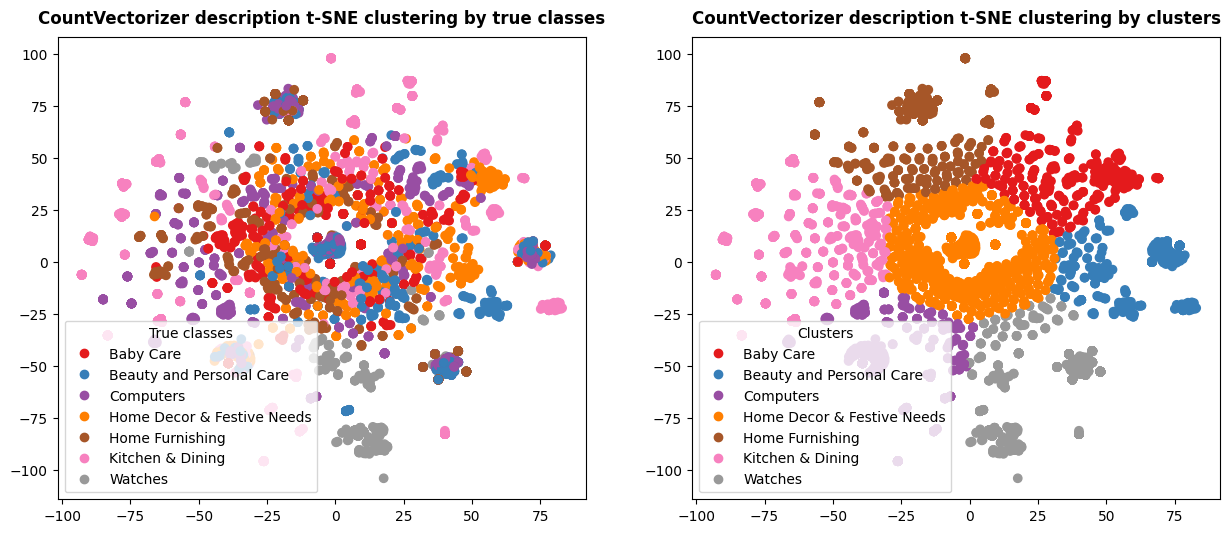

Total time
in 47 s, 677 ms, 182 mus
n_docs: 1050
n_sents: 5199
n_features: 5210
ARI (pred by sent): 0.0565
ARI (pred by doc): 0.1450


In [3]:
from pipeline import tx_ml_bow_tfidf

vectorizer_params = {
    'min_df': 5,
    'max_df': .7,
    'ngram_range': (1, 5)
}

tsne_params = {'perplexity': 40.0}

for sents, cla_labels in corpora:
    clu_labels, ari, total_time, n_features = tx_ml_bow_tfidf(
        sents, cla_labels, name, verbosity=2,
        vectorizer_params=vectorizer_params,
        tsne_params=tsne_params,
    )